Bibliotecas usadas

In [1]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import chi2_contingency
import prince
from prince import MCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore


Carregando a base de dados tratada anteriormente.

In [2]:
df = pd.read_csv('df_tratado.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Educacao             2203 non-null   object 
 1   Renda                2203 non-null   float64
 2   Criancas             2203 non-null   int64  
 3   Adolescentes         2203 non-null   int64  
 4   Recencia             2203 non-null   int64  
 5   Gastos_Vinhos        2203 non-null   int64  
 6   Gastos_Frutas        2203 non-null   int64  
 7   Gastos_Carnes        2203 non-null   int64  
 8   Gastos_Peixes        2203 non-null   int64  
 9   Gastos_Doces         2203 non-null   int64  
 10  Gastos_Ouro          2203 non-null   int64  
 11  Compras_Descontos    2203 non-null   int64  
 12  Compras_Web          2203 non-null   int64  
 13  Compras_Catalogo     2203 non-null   int64  
 14  Compras_Loja         2203 non-null   int64  
 15  Visitas_Web_Mes      2203 non-null   i

Antes de aplicar qualquer algorítimo de clusterização, é muito importante que nossas variáveis sejam analisadas de maneira correta. Minha base contém variáveis contínuas e categóricos, e todas essas informações podem ser importantes para a segmentação dos clientes, por isso é ideal fazer o procedimento da Análise de Compontentes Principais (PCA), que é feita para variáveis contínuas e Análise de Correspondência (ANACOR) para variáveis categóricas, para que possamos reduzir a dimensionalidade dos dados e capturar a maior variabilidade possível de maneira eficiente.


## ANACOR
Transforma as variáveis categóricas em dimensões que representam a associação entre as categorias, ajudando a simplificar os dados, mantendo as informações mais relevantes para a segmentação dos clientes. Como a ANACOR lida com associações, somente as variáveis categóricas podem fazer parte dessa análise. Apesar de ter apenas 2 variáveis categóticas irei fazer o teste qui-quadrado para testar a associação entre elas.

In [3]:
df_anacor = df[['Educacao', 'Convivencia']]

Frequência das variáveis.

In [4]:
print(df_anacor['Educacao'].value_counts())
print(df_anacor['Convivencia'].value_counts())

Educacao
Graduacao        1111
Pos_graduacao     840
Sem Graduacao     252
Name: count, dtype: int64
Convivencia
Parceiro(a)    1422
Sozinho(a)      781
Name: count, dtype: int64


Agora vou realizar o teste qui-quadrado.

- H0: Não há associação entre essas variáveis.
- H1: Existe uma associação entre essas variáveis.

In [5]:
tabela_mca_1 = chi2_contingency(pd.crosstab(df_anacor['Educacao'], df_anacor['Convivencia']))

print(f"p-valor da estatística: {round(tabela_mca_1[1], 4)}")

p-valor da estatística: 0.5878


Não à associação entre as variáveis, logo não será necessário a análise de correspondência.

## PCA
Na análise exploratória feita anteriormente, observei que algumas variáveis estão correlacionadas, com isso, irei aplicar uma Análise de Compontentes principais (PCA), que é uma técnica estatística utilizada para reduzir a dimensionalidade de conjuntos de dados, preservando ao máximo a variabilidade original, ou seja irei simplificar os dados mantendo as informações mais relevantes a partir de eliminação de variáveis redundantes (correlacionadas).

Como a PCA lida com correlações, somente as variáveis contínuas podem fazer parte dessa análise, por isso, irei criar um novo df apenas com essas variáveis, já padronizadas.

In [6]:
df_metricas = df.drop(columns=['Educacao', 'Convivencia'])
df_pca = df_metricas.apply(zscore)
df_pca.head()

,Renda,Criancas,Adolescentes,Recencia,Gastos_Vinhos,Gastos_Frutas,Gastos_Carnes,Gastos_Peixes,Gastos_Doces,Gastos_Ouro,...,Compras_Loja,Visitas_Web_Mes,Total_Gastos,Idade,Filhos,Total_Compras,Gasto_Medio,Acc_Camp,Tamanho_Familia,Anos_Relacionamento
0,0.313176,-0.823262,-0.931556,0.310419,0.973665,1.547618,1.747373,2.447940,1.479323,0.848683,...,-0.564854,0.696234,1.678416,1.016774,-1.267021,1.328091,1.123081,-0.44023,-1.760718,1.497686
1,-0.257455,1.038798,0.905702,-0.380865,-0.875520,-0.639073,-0.732220,-0.652803,-0.635835,-0.736420,...,-1.182561,-0.137128,-0.964805,1.273012,1.402752,-1.170669,-0.985094,-0.44023,0.447572,-1.418268
2,0.965140,-0.823262,-0.931556,-0.795635,0.354306,0.567378,-0.176608,1.335321,-0.149592,-0.040521,...,1.288270,-0.553809,0.280335,0.333471,-1.267021,0.802036,0.151750,-0.44023,-0.656573,0.039709
3,-1.210507,1.038798,-0.931556,-0.795635,-0.875520,-0.563670,-0.667935,-0.506885,-0.587211,-0.755750,...,-0.564854,0.279553,-0.921583,-1.289374,0.067865,-0.907641,-0.910653,-0.44023,0.447572,-1.418268
4,0.320676,1.038798,-0.931556,1.554729,-0.395443,0.416571,-0.217934,0.149742,-0.003719,-0.562445,...,0.052854,-0.137128,-0.308156,-1.033135,0.067865,0.539009,-0.364674,-0.44023,0.447572,-1.418268


Irei aplicar o Teste de Esfericidade de Barlett, que vai comparar minha matriz de correlação com uma matriz determinante, esse teste é fundamental para sabermos se a Análise Fatorial é adequada para o conjunto de dados.

H0: A matriz de correlação é igual a determinante (correlações iguais a 0)

H1: A matriz de correlação é diferente da determinante (correlações diferentes de 0)

In [7]:
bartlett, p_value  = calculate_bartlett_sphericity(df_pca)
print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 266281.49
p-valor: 0.0


Como meu p-valor < 0.05, com 95% de confiança posso afirmar que minhas correlações são diferentes de 0 (como já havia observado na EDA), portanto a análise fatorial é adequada para o meu conjunto de variáveis.

Para identificar em quantos fatores irei reduzir, primeiramente vou começar com todos os fatores possíveis.

In [8]:
fa = FactorAnalyzer(n_factors=23, method='principal', rotation=None).fit(df_pca)

In [9]:
autovalores = fa.get_eigenvalues()[0]
autovalores_1 = autovalores >=1
autovalores_1.sum()

np.int64(6)

Pelo critério de Kaiser (raiz latente), devemos seguir apenas com autovalores > 1, pois isso indica que o componente explica mais variância do que uma variável original, no caso, apenas 4 fatores serão necessários.

In [10]:
fa = FactorAnalyzer(n_factors=6, method='principal', rotation=None).fit(df_pca)

In [11]:
autovalores_fatores = fa.get_factor_variance()

tabela_aut_val = pd.DataFrame(autovalores_fatores)
tabela_aut_val.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_aut_val.columns)]
tabela_aut_val.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_aut_val = tabela_aut_val.T

print(tabela_aut_val)

         Autovalor  Variância  Variância Acumulada
Fator 1   9.498858   0.412994             0.412994
Fator 2   2.898348   0.126015             0.539009
Fator 3   1.487127   0.064658             0.603667
Fator 4   1.195713   0.051988             0.655654
Fator 5   1.155398   0.050235             0.705889
Fator 6   1.010234   0.043923             0.749812


Como observado, os 6 componentes que usaremos explicam aproximadamente 75% da variância acumulada dos dados.

In [12]:
df_fatores = fa.transform(df_pca)

## Clusterização

Para identificar o número ideal de clusters, irei utilizar o Método do Cotovelo que identifica o ponto onde a adição de mais clusters não melhora significativamente a segmentação dos dados e o Método da Silhueta que avalia o ponto onde os clusters estão bem definidos e separados, garantindo a qualidade da segmentação.

O Silhouette Score varia de -1 a 1, onde:
- 1: Indica clusters bem definidos e bem separados.
- 0: Indica clusters que se sobrepõem.
- -1: Indica pontos que podem estar em clusters errados.


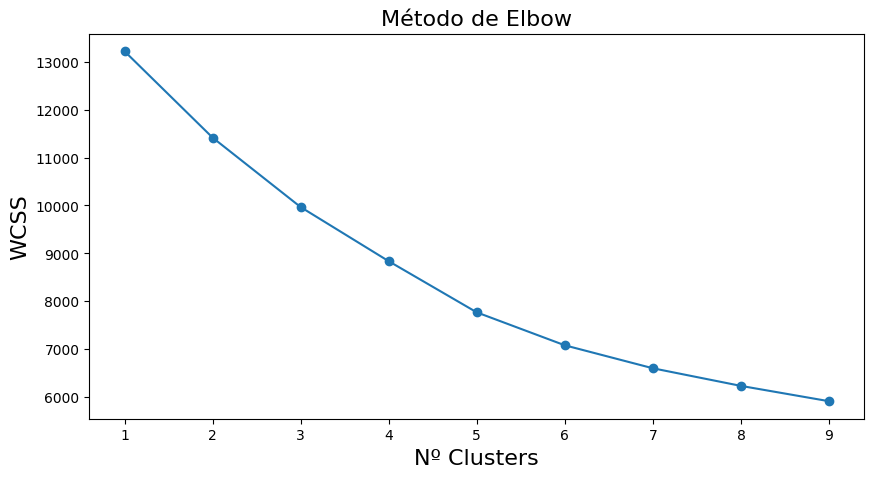

In [13]:
elbow = []
K = range(1,10)
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(df_fatores)
    elbow.append(kmeanElbow.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,10))
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()


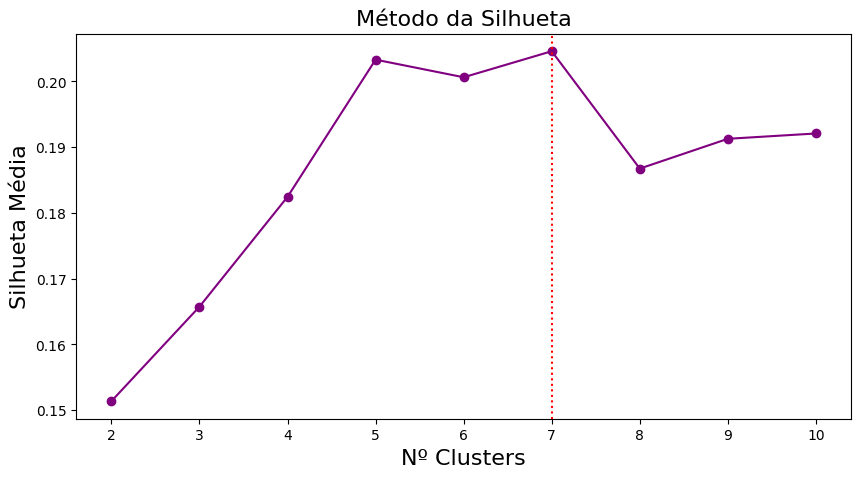

In [14]:
silhueta = []
I = range(2,11) # ponto de parada pode ser parametrizado manualmente
for i in I: 
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=100).fit(df_fatores)
    silhueta.append(silhouette_score(df_fatores, kmeansSil.labels_))

plt.figure(figsize=(10,5))
plt.plot(range(2,11), silhueta, color = 'purple', marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Silhueta Média', fontsize=16)
plt.title('Método da Silhueta', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red') 
plt.show()

Pelo Método do Cotovelo, o gráfico sugere 5 cluster, pelo Método da Silhueta os maiores coeficientes sugerem de 5 a 7 clusters, irei analisar como ficará a distribuição com 5 e 7.

In [15]:
kmeans = KMeans(n_clusters=5, init='random', random_state=100).fit(df_fatores)
df['5_cluster_kmeans'] = kmeans.labels_
df['5_cluster_kmeans'] = df['5_cluster_kmeans'].astype('category')

kmeans = KMeans(n_clusters=7, init='random', random_state=100).fit(df_fatores)
df['7_cluster_kmeans'] = kmeans.labels_
df['7_cluster_kmeans'] = df['7_cluster_kmeans'].astype('category')

In [16]:
silhouette_5 = silhouette_score(df_fatores, df['5_cluster_kmeans'])
silhouette_7 = silhouette_score(df_fatores, df['7_cluster_kmeans'])

print(f"Silhouette Score (5 Clusters): {silhouette_5:.4f}")
print(f"Silhouette Score (7 Clusters): {silhouette_7:.4f}")

print("\nDistribuição dos Clusters (5 Clusters):")
print(df['5_cluster_kmeans'].value_counts())
print("\nDistribuição dos Clusters (7 Clusters):")
print(df['7_cluster_kmeans'].value_counts())

Silhouette Score (5 Clusters): 0.2033
Silhouette Score (7 Clusters): 0.2046

Distribuição dos Clusters (5 Clusters):
5_cluster_kmeans
2    606
3    553
4    443
0    414
1    187
Name: count, dtype: int64

Distribuição dos Clusters (7 Clusters):
7_cluster_kmeans
3    498
1    362
4    317
0    316
2    312
5    242
6    156
Name: count, dtype: int64


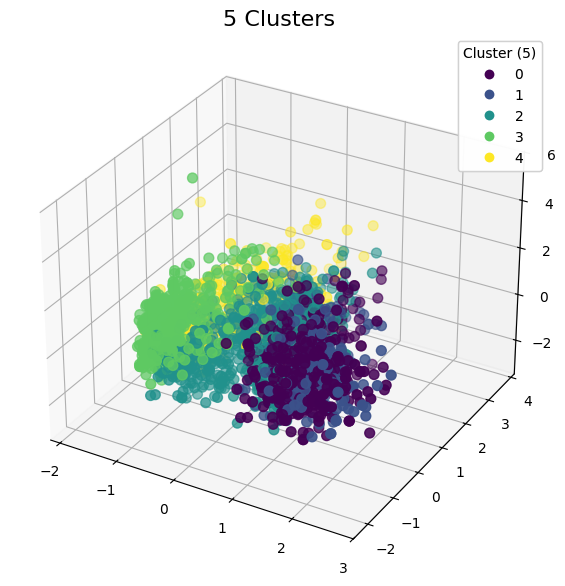

In [17]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_fatores[:, 0], df_fatores[:, 1], df_fatores[:, 2], c=df['5_cluster_kmeans'], cmap='viridis', s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster (5)")
ax.add_artist(legend1)

ax.set_title("5 Clusters", fontsize=16)
plt.show()

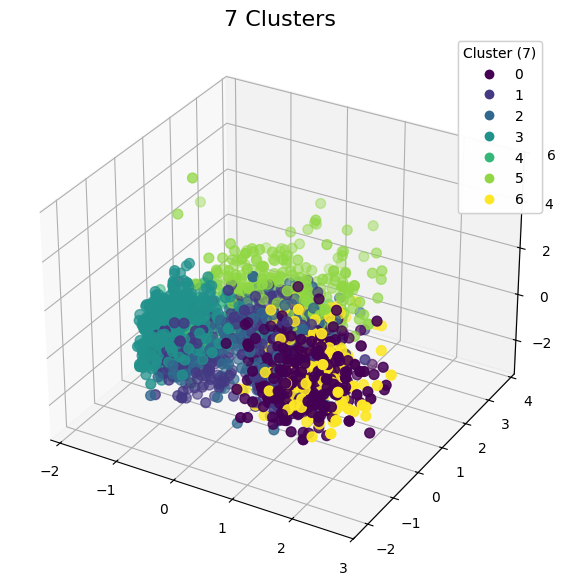

In [18]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_fatores[:, 0], df_fatores[:, 1], df_fatores[:, 2], c=df['7_cluster_kmeans'], cmap='viridis', s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster (7)")
ax.add_artist(legend1)

ax.set_title("7 Clusters", fontsize=16)
plt.show()


* O Silhouette Score é maior para 7 clusters, mas as diferenças entre 5 e 7 é pequena, sugerindo que utilizar uma quantidade maior de clusters pode aumentar a complexidade sem trazer muito benefício à análise.
Distribuição dos Clusters
* 5 Clusters: Apresenta uma boa distribuição, tendo um cluster menor (187 clientes) que pode representar um segmento específico e relevante para análises.
* 7 Clusters: Inclui dois clusters pequenos (156 e 242 clientes), podendo tornar mais difícil interpretar esses grupos.

Pensando em simplicidade, equilíbrio e fácil interpretação, irei utilizar 5 clusters.

In [19]:
df.drop(columns=['7_cluster_kmeans'], inplace=True)
df.rename(columns={'5_cluster_kmeans': 'cluster_kmeans'}, inplace=True)

Agora irei calcular a ANOVA para cada uma das variáveis métricas utilizadas no K-Means para identificar se elas são significativas para a clusterização. 

- F: estatística de teste ( variabilidade entre grupos / variabilidade dentro dos grupos), quando maior o teste F, maior a importância da variável para explicar as diferenças entre os clusters.
- se p-valor < 0.05: a variável é estatisticamente significativa para a formação de pelo menos um cluster.

In [ ]:
kmeans = KMeans(n_clusters=5, init='random', random_state=100).fit(df_fatores)
df_pca['cluster_kmeans'] = kmeans.labels_
df_metricas['cluster_kmeans'] = kmeans.labels_

,Renda,Criancas,Adolescentes,Recencia,Gastos_Vinhos,Gastos_Frutas,Gastos_Carnes,Gastos_Peixes,Gastos_Doces,Gastos_Ouro,...,Visitas_Web_Mes,Total_Gastos,Idade,Filhos,Total_Compras,Gasto_Medio,Acc_Camp,Tamanho_Familia,Anos_Relacionamento,cluster_kmeans
0,58138.0,0,0,58,635,88,546,172,88,88,...,7,1617,68,0,25,64.680000,0,1,13,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,5,27,71,2,6,4.500000,0,3,11,4
2,71613.0,0,0,26,426,49,127,111,21,42,...,4,776,60,0,21,36.952381,0,2,12,2
3,26646.0,1,0,26,11,4,20,10,3,5,...,6,53,41,1,8,6.625000,0,3,11,3
4,58293.0,1,0,94,173,43,118,46,27,15,...,5,422,44,1,19,22.210526,0,3,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,61223.0,0,1,46,709,43,182,42,118,247,...,5,1341,58,1,18,74.500000,0,3,12,0
2199,64014.0,2,1,56,406,0,30,0,0,8,...,7,444,79,3,22,20.181818,1,5,11,4
2200,56981.0,0,0,91,908,48,217,32,12,24,...,6,1241,44,0,19,65.315789,1,1,11,1
2201,69245.0,0,1,8,428,30,214,80,30,61,...,3,843,69,1,23,36.652174,0,3,11,2


In [21]:
# Filtrar apenas as variáveis métricas (excluindo o cluster)
variaveis_metricas = [col for col in df_pca.columns if col != 'cluster_kmeans']

# Lista para armazenar os resultados
resultados_anova = []

# Loop para rodar ANOVA para cada variável
for var in variaveis_metricas:
    anova = pg.anova(dv=var, between='cluster_kmeans', data=df_pca, detailed=True)
    estatistica_F = anova['F'].values[0]
    p_valor = anova['p-unc'].values[0]
    resultados_anova.append({'Variável': var, 'F': estatistica_F, 'p-valor': p_valor})

# Transformar os resultados em DataFrame
df_resultados_anova = pd.DataFrame(resultados_anova)

# Filtrar apenas as variáveis com p-valor < 0.05
variaveis_significativas = df_resultados_anova[df_resultados_anova['p-valor'] < 0.05]

# Ordenar os resultados por F (importância)
variaveis_significativas = variaveis_significativas.sort_values(by='F', ascending=False)

# Exibir o DataFrame final
print(variaveis_significativas)

               Variável            F        p-valor
1              Criancas  1489.245247   0.000000e+00
15         Total_Gastos  1259.083780   0.000000e+00
17               Filhos  1135.534150   0.000000e+00
19          Gasto_Medio   980.264457   0.000000e+00
0                 Renda   961.493808   0.000000e+00
4         Gastos_Vinhos   751.647887   0.000000e+00
6         Gastos_Carnes   636.930752   0.000000e+00
20             Acc_Camp   628.789488   0.000000e+00
2          Adolescentes   612.449057   0.000000e+00
12     Compras_Catalogo   579.621331   0.000000e+00
7         Gastos_Peixes   542.148960   0.000000e+00
21      Tamanho_Familia   537.190700  1.976263e-323
5         Gastos_Frutas   525.335959  3.238432e-318
8          Gastos_Doces   477.044720  2.686854e-296
18        Total_Compras   411.320514  9.421176e-265
13         Compras_Loja   403.445391  7.895843e-261
14      Visitas_Web_Mes   312.924196  2.944404e-213
16                Idade   271.096620  1.435882e-189
11          

Criancas, Total_Compras, Filhos e Renda são as variáveis que têm a maior capacidade de diferenciar os clusters. Isso significa que os clusters têm médias bem distintas para essas variáveis.

Anos_Relacionamento e Compras_Descontos, embora ainda sejam significativas, elas têm menor poder discriminativo em relação aos clusters, ou seja, as diferenças entre os clusters são menores para essas variáveis.

In [22]:
print(df_metricas['cluster_kmeans'].value_counts())

cluster_kmeans
2    606
3    553
4    443
0    414
1    187
Name: count, dtype: int64


In [23]:
pd.set_option('display.max_columns', None)

ordem = [
    'Idade', 'Renda', 'Filhos', 'Criancas', 'Adolescentes', 'Tamanho_Familia',
    'Total_Compras', 'Recencia', 'Visitas_Web_Mes', 'Acc_Camp',
    'Anos_Relacionamento', 'Total_Gastos', 'Gasto_Medio', 'Compras_Loja',
    'Compras_Catalogo','Compras_Web' ,'Compras_Descontos', 'Gastos_Vinhos', 'Gastos_Carnes',
    'Gastos_Peixes', 'Gastos_Doces', 'Gastos_Frutas', 'Gastos_Ouro', 'cluster_kmeans'
]
df_metricas = df_metricas[ordem]

df_metricas.groupby('cluster_kmeans').describe()

Idade                                                      \
                count       mean        std   min   25%   50%   75%   max   
cluster_kmeans                                                              
0               414.0  54.454106  11.842042  30.0  46.0  54.0  63.0  81.0   
1               187.0  55.807487  12.846293  30.0  46.0  55.0  66.0  84.0   
2               606.0  64.090759   9.254886  38.0  57.0  65.0  71.0  85.0   
3               553.0  46.092224   6.943391  29.0  41.0  46.0  52.0  68.0   
4               443.0  59.302483   8.919888  36.0  52.0  58.0  67.0  79.0   

                Renda                                                          \
                count          mean           std      min       25%      50%   
cluster_kmeans                                                                  
0               414.0  72309.475845  11266.710334   2447.0  66680.75  72537.0   
1               187.0  77929.160428  11550.358227  46374.0  71552.00  79174.0   
2               606.0  54677.674917  14030.053208   4428.0  46545.50  55801.5   
3               553.0  29767.996383  10588.268050   1730.0  22434.00  30023.0   
4               443.0  44499.112867  13787.714575   4023.0  35789.50  44078.0   

                                   Filhos                                     \
                     75%       max  count      mean       std  min  25%  50%   
cluster_kmeans                                                                 
0               80139.00  105471.0  414.0  0.321256  0.482811  0.0  0.0  0.0   
1               84929.50  102692.0  187.0  0.326203  0.524156  0.0  0.0  0.0   
2               64848.25  113734.0  606.0  0.806931  0.446124  0.0  1.0  1.0   
3               37150.00   66503.0  553.0  0.867993  0.388614  0.0  1.0  1.0   
4               53372.50   94871.0  443.0  2.094808  0.343057  1.0  2.0  2.0   

                         Criancas                                          \
                75%  max    count      mean       std  min  25%  50%  75%   
cluster_kmeans                                                              
0               1.0  2.0    414.0  0.060386  0.238490  0.0  0.0  0.0  0.0   
1               1.0  3.0    187.0  0.058824  0.235926  0.0  0.0  0.0  0.0   
2               1.0  2.0    606.0  0.001650  0.040622  0.0  0.0  0.0  0.0   
3               1.0  2.0    553.0  0.846293  0.380539  0.0  1.0  1.0  1.0   
4               2.0  3.0    443.0  1.058691  0.357448  0.0  1.0  1.0  1.0   

                    Adolescentes                                               \
                max        count      mean       std  min  25%  50%  75%  max   
cluster_kmeans                                                                  
0               1.0        414.0  0.260870  0.450521  0.0  0.0  0.0  1.0  2.0   
1               1.0        187.0  0.267380  0.467382  0.0  0.0  0.0  1.0  2.0   
2               1.0        606.0  0.805281  0.443545  0.0  1.0  1.0  1.0  2.0   
3               2.0        553.0  0.021700  0.145833  0.0  0.0  0.0  0.0  1.0   
4               2.0        443.0  1.036117  0.347656  0.0  1.0  1.0  1.0  2.0   

               Tamanho_Familia                                               \
                         count      mean       std  min  25%  50%  75%  max   
cluster_kmeans                                                                
0                        414.0  1.934783  0.704945  1.0  1.0  2.0  2.0  3.0   
1                        187.0  1.973262  0.750864  1.0  1.0  2.0  2.0  5.0   
2                        606.0  2.445545  0.662705  1.0  2.0  3.0  3.0  4.0   
3                        553.0  2.511754  0.605191  1.0  2.0  3.0  3.0  4.0   
4                        443.0  3.781038  0.554212  3.0  3.0  4.0  4.0  5.0   

               Total_Compras                                                \
                       count       mean       std   min    25%   50%   75%   
cluster_kmeans                                        

A variação predominante pode ser mais útil pra entendimento das características de cada cluster, por isso irei utilizar o Intervalo Interquartil (IQR) para indicar essa variação.

### Cluster 0
**Características Demográficas**
* Número de Clientes: 414.
* Idade: Em média, 54 anos, variando entre 46 e 63 anos (IQR).
* Renda: Média de $72.309,48, com a maioria dos clientes ganhando entre $66.681,00 e $80.139,00 (IQR).
* Filhos: Geralmente não possuem filhos.
* Tamanho da Família: Geralmente entre 1 e 2 pessoas, com a maioria sendo 2 pessoas (IQR).

**Comportamento de Compras**
* Total de Compras: Em média, 21 compras, com a maioria realizando entre 17 e 24 compras (IQR).
* Visitas ao Site: Média de 3 visitas por mês, com a maioria variando entre 2 e 4 (IQR).
* Aceitação de Campanhas: Em geral, não aceitam ofertas nas campanhas.

**Gastos Totais**
* Total de Gastos: Em média, $1.275,03, com a maioria gastando entre $976,00 e $1.558,00 (IQR).
* Gasto Médio por Compra: $62,94, com a maioria gastando entre $41,52 e $71,93 (IQR).

**Preferência de Compra**
* Loja Física: 8 compras por cliente, em média.
* Catálogo: 5 compras por cliente, em média.
* Web: 5 compras por cliente, em média.
* Descontos: Em média, 7% das compras são com desconto.

**Gastos por Categorias de Produtos**
* Vinhos: Gastos médios de $491,70.
* Carnes: Gastos médios de $423,35.
* Peixes: Gastos médios de $112,68.
* Doces: Gastos médios de $81,17.
* Frutas: Gastos médios de $81,29.
* Produtos Ouro: Gastos médios de $84,84.
### Cluster 1
**Características Demográficas**
* Número de Clientes: 187.
* Idade: Em média, 55 anos, variando entre 46 e 66 anos (IQR).
* Renda: Média de $77.929,16, com a maioria dos clientes ganhando entre $71.552,00 e $84.929,50 (IQR).
* Filhos: Geralmente não possuem filhos.
* Tamanho da Família: Geralmente 1 ou 2 pessoas, com a maioria sendo 2 pessoas (IQR).

**Comportamento de Compras**
* Total de Compras: Em média, 21 compras, com a maioria realizando entre 18 e 24 compras (IQR).
* Visitas ao Site: Média de 4 visitas por mês, com a maioria variando entre 2 e 6 (IQR).
* Aceitação de Campanhas: Aceitam 40% campanhas em média, apenas esse grupo tem uma recorrência de aceitação de campanhas.

**Gastos Totais**
* Total de Gastos: Em média, $1.569,46, com a maioria gastando entre $1.292,00 e $1.864,50 (IQR).
* Gasto Médio por Compra: $77,72, com a maioria gastando entre $59,61 e $100,48 (IQR).

**Preferência de Compra**
* Loja Física: 8 compras por cliente, em média.
* Catálogo: 5 compras por cliente, em média.
* Web: 5 compras por cliente, em média.
* Descontos: Em média, 7% das compras são com desconto.

**Gastos por Categorias de Produtos**
* Vinhos: Gastos médios de $950,43.
* Carnes: Gastos médios de $411,38.
* Peixes: Gastos médios de $61,10.
* Doces: Gastos médios de $46,42.
* Frutas: Gastos médios de $38,39.
* Produtos Ouro: Gastos médios de $61,73.
### Cluster 2
**Características Demográficas**
* Número de Clientes: 606.
* Idade: Em média, 64 anos, variando entre 57 e 71 anos (IQR).
* Renda: Média de $54.677,67, com a maioria dos clientes ganhando entre $46.546,00 e $64.848,25 (IQR).
* Filhos: Geralmente possuem 1 filho, adolescente.
* Tamanho da Família: Geralmente 2 ou 3 pessoas, com a maioria sendo 3 pessoas (IQR).

**Comportamento de Compras**
* Total de Compras: Em média, 17 compras, com a maioria realizando entre 12 e 22 compras (IQR).
* Visitas ao Site: Média de 5 visitas por mês, com a maioria variando entre 4 e 7 (IQR).
* Aceitação de Campanhas: Não aceitam ofertas.

**Gastos Totais**
* Total de Gastos: Em média, $579,14, com a maioria gastando entre $257,50 e $901,50 (IQR).
* Gasto Médio por Compra: $30,29, com a maioria gastando entre $20,22 e $36,93 (IQR).

**Preferência de Compra**
* Loja Física: 6 compras por cliente, em média.
* Catálogo: 3 compras por cliente, em média.
* Web: 5 compras por cliente, em média.
* Descontos: Em média, 14% das compras são com desconto.

**Gastos por Categorias de Produtos**
* Vinhos: Gastos médios de $349,62.
* Carnes: Gastos médios de $121,59.
* Peixes: Gastos médios de $25,00.
* Doces: Gastos médios de $16,82.
* Frutas: Gastos médios de $17,47.
* Produtos Ouro: Gastos médios de $48,64.
### Cluster 3
**Características Demográficas**
* Número de Clientes: 553.
* Idade: Em média, 46 anos, variando entre 41 e 52 anos (IQR).
* Renda: Média de $29.767,99, com a maioria dos clientes ganhando entre $22.434,00 e $37.150,00 (IQR).
* Filhos: Geralmente possuem 1 filho, criança.
* Tamanho da Família: Geralmente 2 ou 3 pessoas, com a maioria sendo 3 pessoas (IQR).

**Comportamento de Compras**
* Total de Compras: Em média, 8 compras, com a maioria realizando entre 5 e 10 compras (IQR).
* Visitas ao Site: Média de 7 visitas por mês, com a maioria variando entre 6 e 8 (IQR).
* Aceitação de Campanhas: Não aceitam ofertas.

**Gastos Totais**
* Total de Gastos: Em média, $116,09, com a maioria gastando entre $38,00 e $125,00 (IQR).
* Gasto Médio por Compra: $11,95, com a maioria gastando entre $6,33 e $14,55 (IQR).

**Preferência de Compra**
* Loja Física: 3 compras por cliente, em média.
* Catálogo: Não compram por esse canal.
* Web: 2 compras por cliente, em média.
* Descontos: Em média, 25% das compras são com desconto.

**Gastos por Categorias de Produtos**
* Vinhos: Gastos médios de $42,51.
* Carnes: Gastos médios de $29,82.
* Peixes: Gastos médios de $10,27.
* Doces: Gastos médios de $6,89.
* Frutas: Gastos médios de $6,54.
* Produtos Ouro: Gastos médios de $20,05.
### Cluster 4
**Características Demográficas**
* Número de Clientes: 443.
* Idade: Em média, 59 anos, variando entre 52 e 67 anos (IQR).
* Renda: Média de $44.499,11, com a maioria dos clientes ganhando entre $35.789,50 e $53.372,50 (IQR).
* Filhos: Geralmente possuem 2 filhos, sendo uma criança e um adolescente.
* Tamanho da Família: Geralmente entre 3 e 4 pessoas, sendo na maioria 4 (IQR).

**Comportamento de Compras**
* Total de Compras: Em média, 12 compras, com a maioria realizando entre 6 e 16 compras (IQR).
* Visitas ao Site: Média de 6 visitas por mês, com a maioria variando entre 5 e 7 (IQR).
* Aceitação de Campanhas: Não aceitam ofertas.

**Gastos Totais**
* Total de Gastos: Em média, $229,17, com a maioria gastando entre $44,00 e $295,00 (IQR).
* Gasto Médio por Compra: $14,23, com a maioria gastando entre $6,33 e $18,73 (IQR).

**Preferência de Compra**
* Loja Física: 4 compras por cliente, em média.
* Catálogo: 1 compra por cliente, em média.
* Web: 3 compras por cliente, em média.
* Descontos: Em média, 30% das compras são com desconto.

**Gastos por Categorias de Produtos**
* Vinhos: Gastos médios de $131,87.
* Carnes: Gastos médios de $49,98.
* Peixes: Gastos médios de $9,80.
* Doces: Gastos médios de $7,97.
* Frutas: Gastos médios de $7,18.
* Produtos Ouro: Gastos médios de $22,37.

Com isso, decidi dar nome aos clusters baseado nas características.

**Cluster 0: "Premium"**
- Clientes de renda alta, que realizam muitas compras com alto gasto total. Têm uma preferência destacada por vinhos e carnes. Utilizam diversos canais, incluindo o catálogo e raramente aceitam campanhas.

**Cluster 1: "Exclusivos"**
- Clientes de alta renda, com consumo expressivo em vinhos e carnes. Geralmente não têm filhos e têm um consumo mais sofisticado, com o maior gasto médio por compra. Geralmente aceitam 40% campanhas. Usam todos os canais, tendo uma preferência por lojas físicas.

**Cluster 2: "Estáveis"**
- Clientes de renda média alta, geralmente com um filho adolescente. Realizam um número razoável de compras, gastando principalmente em vinhos e carnes. Compram tanto pela lojas física, como pela online, usando com menor frequência o catálogo, raramente aceitam campanhas.

**Cluster 3: "Essenciais"**
- Clientes com renda baixa e menores gastos, geralmente com um filho criança. Realizam poucas compras sendo pela loja física ou online e não interagem com campanhas. Priorizam o custo-benefício, comprando com desconto em 25% das compras.

**Cluster 4: "Econômicos"**
- Clientes de renda média, com famílias maiores e geralmente possuindo dois filhos, sendo criança e adolescente. Realizam poucas compras e buscam descontos em cerca de 30% das compras. Preferem lojas físicas, comprando também pela loja online, e raramente aceitam campanhas.


In [24]:
df['cluster_kmeans'] = df['cluster_kmeans'].map({0: 'Premium', 1: 'Exclusivos', 2: 'Estaveis', 3: 'Essenciais', 4: 'Econômicos'})

Com os clusters já formados, agora irei plotar um gráfico de dispersão entre a renda, que é um dos principais fatores para determinar cada cluster, com as variáveis total de gastos, total de compras e gasto médio por compra que também foram influentes para a formação dos clusters

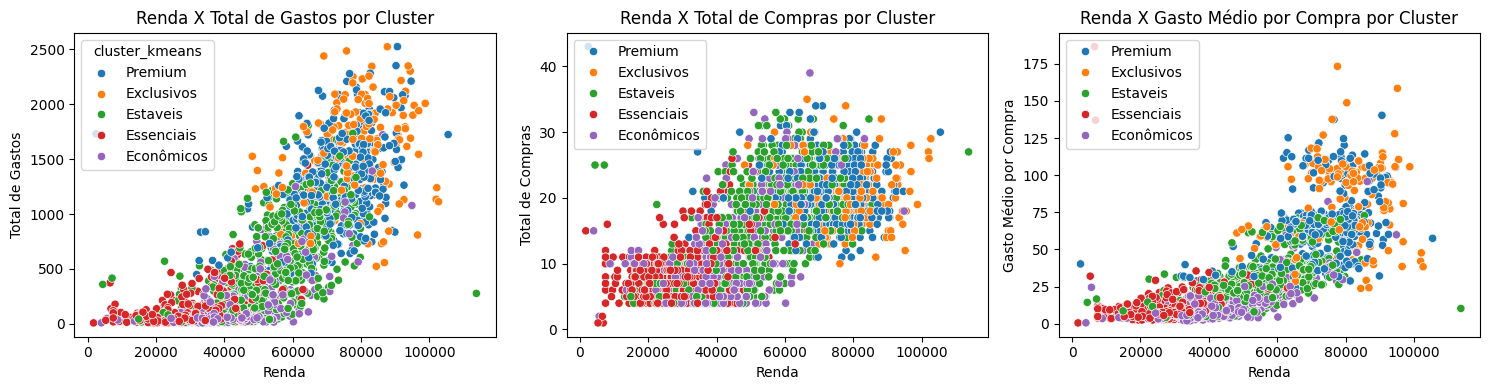

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

ax0 = sns.scatterplot(data=df, x='Renda', y='Total_Gastos', hue='cluster_kmeans', ax=axes[0])
ax0.set_title('Renda X Total de Gastos por Cluster')
ax0.set_xlabel('Renda')
ax0.set_ylabel('Total de Gastos')

ax1 = sns.scatterplot(data=df, x='Renda', y='Total_Compras', hue='cluster_kmeans', ax=axes[1])
ax1.set_title('Renda X Total de Compras por Cluster')
ax1.set_xlabel('Renda')
ax1.set_ylabel('Total de Compras')
ax1.legend(loc='upper left')

ax2 = sns.scatterplot(data=df, x='Renda', y='Gasto_Medio', hue='cluster_kmeans', ax=axes[2])
ax2.set_title('Renda X Gasto Médio por Compra por Cluster')
ax2.set_xlabel('Renda')
ax2.set_ylabel('Gasto Médio por Compra')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

Os gráficos reforçam as diferenças entre os clusters:

- Exclusivos (verde) e Premium (roxo) são os clusters de maior poder aquisitivo, com maior gasto total e gasto médio por compra.
- Econômicos (laranja) e Essenciais (vermelho) são grupos de baixa renda, com baixo volume de compras e gastos médios reduzidos.
- Estáveis (azul) estão no meio da dispersão, com comportamento consistente e estável.

In [26]:
categorical_features = ['Educacao', 'Convivencia', 'cluster_kmeans']

C:\Users\gabri\AppData\Local\Temp\ipykernel_10344\2729008304.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Cluster')


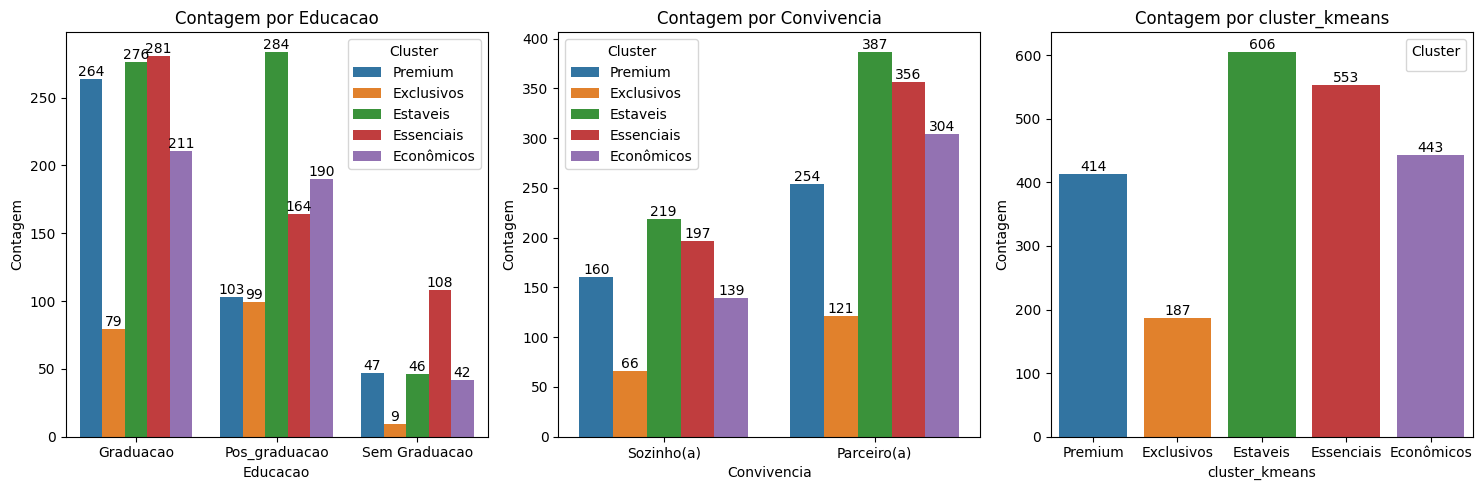

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  

for i, feature in enumerate(categorical_features):
    ax = sns.countplot(data=df, x=feature, hue='cluster_kmeans', ax=axes[i])
    axes[i].set_title(f'Contagem por {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Contagem')
    axes[i].legend(title='Cluster')
    
    # Adicionando os valores das contagens nas barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')

# Ajustar o layout
plt.tight_layout()
plt.show()


**Educação:** É possível observar que a maioria dos clusters apresenta um nível de educação mais elevado, refletindo características como renda média a alta. No entanto, o Cluster Essenciais se destaca por ter uma proporção maior de pessoas sem graduação, o que é esperado pelas características desse grupo, que possui baixa renda.

**Convivência:** Como já observado anteriormente a grande parte dos nossos clientes têm um parceiro.

## Conclusão
Nesse projeto de ciência de dados foram realizadas análises exploratórias, estatísticas e uma segmentação com o algoritmo K-Means, com o objetivo de entender melhor os clientes e agrupá-los em perfis com características semelhantes dentro de grupos e diferentes entre si. Foram identificados cinco clusters, como “Premium” e “Essenciais”, que destacaram diferenças marcantes em renda, gastos e preferência por canais de compra. Além disso, foram descobertos padrões relevantes, como o fato de clientes sem filhos gastarem mais e a preferência geral por lojas físicas, sendo o catálogo, utilizado por grupos de renda mais alta. Esses insights permitem aumentar o engajamento, personalizar campanhas e aprimorar estratégias, além de oferecer uma compreensão detalhada dos diferentes perfis de consumo, tornando as ações mais assertivas e eficazes.